---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 4
---

Please write your full name here

- **Name** : "Andrew Mushen"
- **BN** : 15


# Assignment_3 DT


In [1]:
# Python ≥3.5 is required
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import numpy as np
import sklearn
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

# Common imports

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Part 1 Decision Tree


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=0.7, random_state=42)

tree_clf = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(xtrain, ytrain)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz


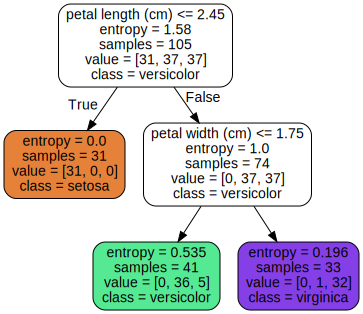

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=os.path.join("./", "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join("./", "iris_tree.dot"))


## Q2 Plotting decision boundaries


Use the following function to plot the decision boundaries of DT from Q1


In [4]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1],
                 "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2],
                 "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


Plotting for max_depth = 2


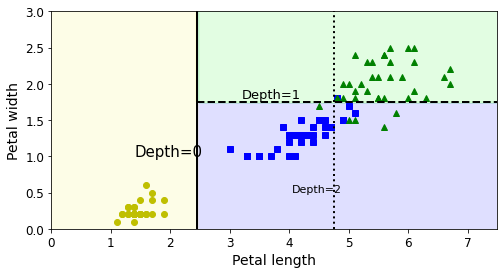

In [5]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, xtrain, ytrain)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.75, 4.75], [0, 1.75], "k:", linewidth=2)
plt.plot([4.75, 4.75], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)
plt.show()


### Q2.1

- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries


**Question**

1. After plotting the resulting tree.
   - What's the output entropy in each block?
   - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max*depth = 1, max_depth = 2, max_depth = 10? \_Hint: Plot the tree in each case*


**Answer**


1. the entropy on the "left box" that classifies 'iris=setosa' perfectly is 0 on the other hand the "right box" will just classify what's not 'iris-setosa' as ' iris-versicolor' neglecting the probablity of it being 'iris-virgenica' it has the entropy of 1.0

2. map_depth is like the question answered or the hight of the tree

- so max_depth of value 1 means only one question with has only two aswers
- max_depth of value 2 means 2 questions which gives a better classification
- max depth of value 10 is tree with hight of 11, which will give very high training score but also causes over fitting
- it's better to keep the max depth values at the range of features/classification


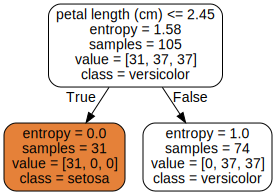

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=0.7, random_state=42)
tree_clf_dpt1 = DecisionTreeClassifier(
    max_depth=1, random_state=42, criterion='entropy')
tree_clf_dpt1.fit(xtrain, ytrain)


export_graphviz(
    tree_clf_dpt1,
    out_file=os.path.join("./", "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join("./", "iris_tree.dot"))


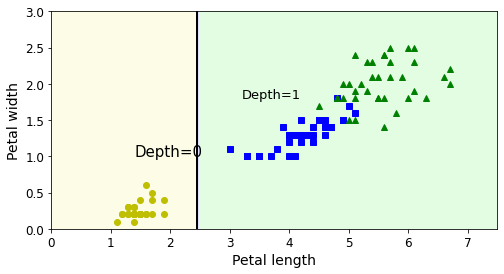

In [7]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf_dpt1, xtrain, ytrain)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
#plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
#plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
#plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
#plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()


### Q2.2


**Question**

1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.


**Answer**

1.


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, )
tree_clf_dpt2 = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='entropy')
tree_clf_dpt2.fit(xtrain, ytrain)

x1 = [[5, 1.5]]


## **retraining the classifier will change predict_proba() classes probabilities of X1**

In [34]:
print("probablity for X to be in class one is ", 0/31)
print("probablity for X to be in class two is ", 36/41)
print("probablity for X to be in class three is ", 5/41)

tree_clf_dpt2.predict_proba(x1)

probablity for X to be in class one is  0.0
probablity for X to be in class two is  0.8780487804878049
probablity for X to be in class three is  0.12195121951219512


array([[0.   , 0.875, 0.125]])

In [29]:
counter1 = 0
counter2 = 0
for idx, num in enumerate(xtrain):
    if (xtrain[idx][0] > 2.45) & (xtrain[idx][1] <= 1.75) :
        counter2 += 1
print(counter2)   

38


## Question 3 Sensitivity to data


### Q3.1 Decision Tree

**Question**

1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=0.7, random_state=0)
tree_origional_data = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='entropy')
tree_origional_data.fit(xtrain, ytrain)
print("Decsion tree train score for orgional data =",
      tree_origional_data.score(xtrain, ytrain))
print("Decsion tree test score for orgional data =",
      tree_origional_data.score(xtest, ytest))


Decsion tree train score for orgional data = 0.9619047619047619
Decsion tree test score for orgional data = 0.9111111111111111


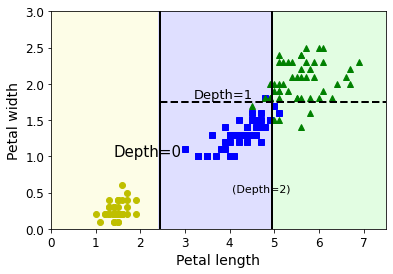

In [ ]:
plot_decision_boundary(tree_origional_data, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 3], "k-", linewidth=2)
#plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()


The following cell rotates the data by angle 20


In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array(
    [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)


**Question**

1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(
    Xr, y, train_size=0.7, random_state=0)

tree_rotated_data = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='entropy')

tree_rotated_data.fit(xtrain, ytrain)
print("Decsion tree train score for rotated data =",
      tree_rotated_data.score(xtrain, ytrain))
print("Decsion tree test score for rotated data =",
      tree_rotated_data.score(xtest, ytest))


Decsion tree train score for rotated data = 0.9714285714285714
Decsion tree test score for rotated data = 0.9555555555555556


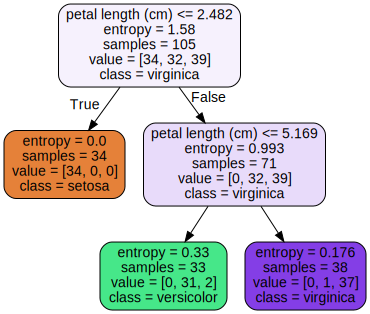

In [ ]:
export_graphviz(
    tree_rotated_data,
    out_file=os.path.join("./", "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join("./", "iris_tree.dot"))


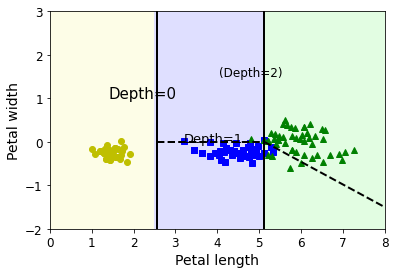

In [ ]:
plot_decision_boundary(tree_rotated_data, Xr, y, axes=[0, 8, -2, 3])

plt.plot([2.559, 2.559], [-2, 3], "k-", linewidth=2)
plt.plot([2.559, 5.122], [0, 0], "k--", linewidth=2)
plt.plot([5.122, 8], [0, -1.5], "k--", linewidth=2)
plt.plot([5.122, 5.122], [-2, 3], "k-", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 0, "Depth=1", fontsize=13)
plt.text(4.05, 1.5, "(Depth=2)", fontsize=12)

plt.show()


### Q3.2 Logistic Regression

The following function plots the decision boundaries for a logistic regression classifier


In [ ]:
import numpy as np


def plot_logistic_regression(clf, X, y, axes, iris=True):

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Iris virginica")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.legend(loc="lower right", fontsize=14)
    plt.show()


**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=0.7, random_state=0)

logistic = LogisticRegression()
param_dict_log = {
    "penalty": ['l1', 'l2', 'none'],
    "solver": ['newton-cg', 'lbfgs'],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

logistic_grid = GridSearchCV(
    logistic,
    param_dict_log,
    cv=10,
    scoring='accuracy',
    return_train_score=False,
    verbose=1)
logistic_grid.fit(xtrain, ytrain)
print(logistic_grid.best_estimator_.get_params()['penalty'],)
print(logistic_grid.best_estimator_.get_params()['solver'])
print(logistic_grid.best_estimator_.get_params()['C'])

logistic_tunned = LogisticRegression(
    penalty=logistic_grid.best_estimator_.get_params()['penalty'],
    solver=logistic_grid.best_estimator_.get_params()['solver'],
    C=logistic_grid.best_estimator_.get_params()['C'])

#logistic_tunned = LogisticRegression(penalty = 'l2',solver='newton-cg',C=1)
logistic_best_model = logistic_tunned.fit(xtrain, ytrain)

print("Logistic Regression train score for Origional data =",
      logistic_best_model.score(xtrain, ytrain))
print("Logistic Regression test score for Origional data =",
      logistic_best_model.score(xtest, ytest))


Fitting 10 folds for each of 48 candidates, totalling 480 fits
l2
newton-cg
1
Logistic Regression train score for Origional data = 0.9714285714285714
Logistic Regression test score for Origional data = 0.9777777777777777


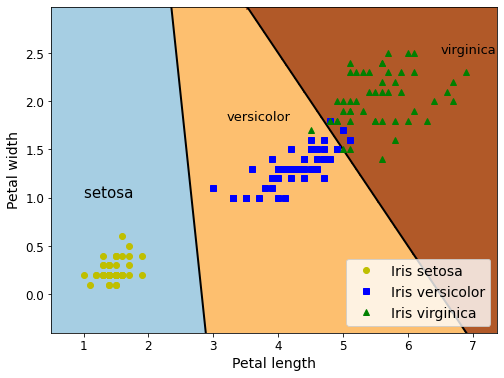

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot([2.9, 2.35], [-0.5, 3], "k-", linewidth=2)
plt.plot([7, 3.5], [-0.5, 3], "k-", linewidth=2)

plt.text(1.0, 1.0, "setosa ", fontsize=15)
plt.text(3.2, 1.80, "versicolor", fontsize=13)
plt.text(6.5, 2.5, "virginica", fontsize=13)

plot_logistic_regression(logistic_best_model, X, y,
                         axes=[0, 7.5, 0, 3], iris=True)


plt.show()


**Question**

1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
xtrain, xtest, ytrain, ytest = train_test_split(
    Xr, y, train_size=0.7, random_state=0)

logistic = LogisticRegression()
param_dict_log = {
    "penalty": ['l1', 'l2', 'none'],
    "solver": ['newton-cg', 'lbfgs'],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

logistic_grid = GridSearchCV(
    logistic,
    param_dict_log,
    cv=10,
    scoring='accuracy',
    return_train_score=False,
    verbose=1)
logistic_grid.fit(xtrain, ytrain)
print(logistic_grid.best_estimator_.get_params()['penalty'],)
print(logistic_grid.best_estimator_.get_params()['solver'])
print(logistic_grid.best_estimator_.get_params()['C'])

logistic_tunned = LogisticRegression(
    penalty=logistic_grid.best_estimator_.get_params()['penalty'],
    solver=logistic_grid.best_estimator_.get_params()['solver'],
    C=logistic_grid.best_estimator_.get_params()['C'])

#logistic_tunned = LogisticRegression(penalty = 'l2',solver='newton-cg',C=1)
logistic_best_model_rotated = logistic_tunned.fit(xtrain, ytrain)
print("Logistic Regression train score for rotated data =",
      logistic_best_model_rotated.score(xtrain, ytrain))
print("Logistic Regression test score for rotated data =",
      logistic_best_model_rotated.score(xtest, ytest))


Fitting 10 folds for each of 48 candidates, totalling 480 fits
l2
newton-cg
1
Logistic Regression train score for rotated data = 0.9714285714285714
Logistic Regression test score for rotated data = 0.9777777777777777


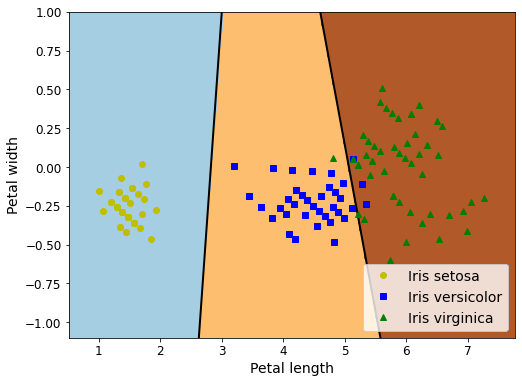

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot([2.6, 3], [-1.25, 1], "k-", linewidth=2)
plt.plot([5.65, 4.6], [-1.25, 1], "k-", linewidth=2)

#plt.text(1.0, 1.0, "setosa ", fontsize=15)
#plt.text(3.2, 1.80, "versicolor", fontsize=13)
#plt.text(6.5, 2.5, "virginica", fontsize=13)

plot_logistic_regression(logistic_best_model_rotated,
                         Xr, y, axes=[0, 8, -2, 3], iris=True)


plt.show()


### Q3.3

1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?


**Answer**

1. - logistic regresion performs much better than the Decsion tree with both normal and rotated data

2. - cause the data set is a 2D linear based data set, logestic regression performs much better with than tree with those type of data sets
   - rotating this type of data won't change the performance of the logistic regresion


## Question 4 GridSearch


1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.


In [ ]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
X_moon, y_moon = make_moons(n_samples=10000, noise=0.4, random_state=42)


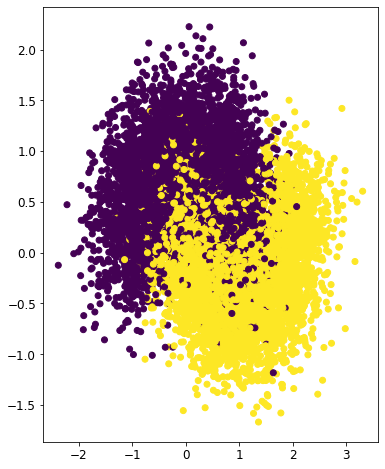

In [ ]:
import matplotlib.pyplot as plt

fig, moon = plt.subplots(figsize=(6, 8))
moon.scatter(x=X_moon[:, 0], y=X_moon[:, 1], c=y_moon)


2. Split it into a training set and a test set using train_test_split().


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_moon, y_moon, train_size=0.7, random_state=0)


3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier.
   - Choose reasonable values for each hyperparameter.
   - Apply GridSearch on a portion of training data.


In [ ]:
classifier = DecisionTreeClassifier()

param_dict = {
    "criterion": ['entropy'],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 5),
    "max_leaf_nodes": range(1, 10)
}

classification_tree_grod = GridSearchCV(
    classifier,
    param_grid=param_dict,
    cv=10,
    verbose=1,
    n_jobs=-1,
    return_train_score=False,
    scoring='accuracy'
)
X_train_portion, _, y_train_portion, _ = train_test_split(
    X_train, y_train, train_size=0.5)
classification_tree_grod.fit(X_train_portion, y_train_portion)

classification_tree_tuned = DecisionTreeClassifier(
    max_depth=classification_tree_grod.best_estimator_.get_params()[
        'max_depth'],
    criterion=classification_tree_grod.best_estimator_.get_params()[
        'criterion'],
    max_leaf_nodes=classification_tree_grod.best_estimator_.get_params()[
        'max_leaf_nodes'],
    min_samples_split=classification_tree_grod.best_estimator_.get_params()[
        'min_samples_split']
)


Fitting 10 folds for each of 324 candidates, totalling 3240 fits


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.


In [ ]:
best_classfication_tree = classification_tree_tuned.fit(X_train, y_train)
print("Classification tree train score for moon data =",
      best_classfication_tree.score(X_train, y_train))
print("Classification tree test score for moon data =",
      best_classfication_tree.score(X_test, y_test))


Classification tree train score for moon data = 0.862
Classification tree test score for moon data = 0.846


## Question 4 Regression Tree


### Question

For the following plot of the two decision tree regressors:

1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?


**Answer**

1. the blue graph is underfit , gree is overfit both models need model adjustments to give better results
2. the green model is overfitting, thus it has higher variance to fix this we apply some pruning or making the model less complex
3. the blue model is underfitting thus, it has higher bias to a certian values to fix this we apply more complex model


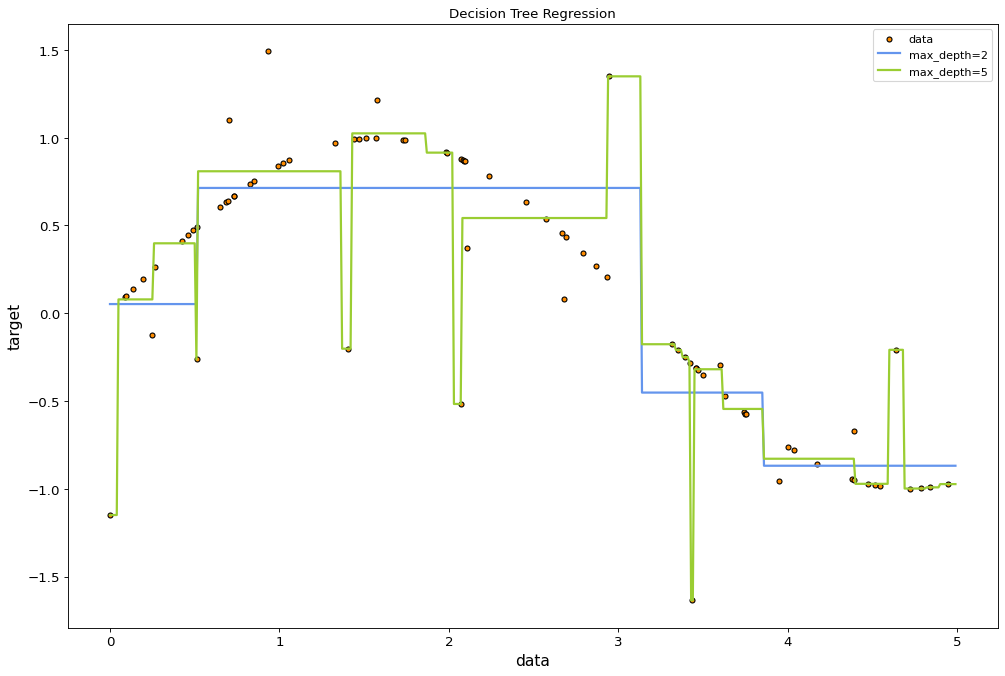

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15, 10), dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
